In [1]:
# 도미와 빙어의 데이터 합침
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# 생선의 길이와 무게를 하나의 2차원 리스트로
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
# 49개의 샘플 중, 35개가 training set, 14개가 test set
fish_target = [1] * 35 + [0] * 14

In [4]:
# import한 후 모델 객체 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [5]:
# 0번째부터 4번째 index, 즉 5개의 원소 출력
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [6]:
# 위에것과 기능 같음
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


In [8]:
# 마지막 5개 출력
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
# training set 0부터 34까지
train_input = fish_data[:35]
train_target = fish_target[:35]

# test set 35부터 마지막까지
test_input = fish_data[35:]
test_target = fish_target[35:]

In [10]:
# training set으로 모델 훈련
kn = kn.fit(train_input, train_target)

# test set으로 모델 평가
kn.score(test_input, test_target)

0.0

정확도 = 0.0

> 이유는 잘못된 데이터 나누기!
빙어가 훈련세트에 하나도 들어 있지 않다.
sampling bias 샘플링 편향 이라고 한다. 샘플이 골고루 섞여 있지 않는다는 뜻.
training 도미만 있고 test 빙어만 있다.
데이터를 랜덤화 시켜서 골고루 나눠야 한다.

In [11]:
import numpy as np

In [13]:
# 파이썬 리스트를 넘파이 배열로 바꾸기

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [14]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [15]:
print(input_arr.shape)
# (샘플 수, feature특성 수) 출력 해준다

(49, 2)


In [16]:
# 랜덤 시드 42 지정
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

In [17]:
# 랜덤으로 바뀐 인덱스 확인
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [18]:
# 배열 인덱싱. 몇 개의 샘플을 선택하여 출력. 두 번째와 네 번째
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [19]:
# 랜덤한 35개의 샘플을 training set으로 만들기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [22]:
# train_input의 첫 번째 원소는 input_arr의 14번째. 왜냐면 index 첫 번째 값이 13.
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


In [23]:
# 남은 14개를 test set으로 만들기
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

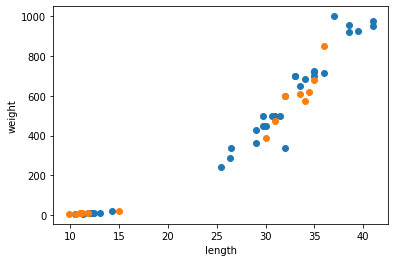

In [24]:
# training set 그리고 test set 잘 섞여있는지 확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

두 번째 머신러닝 프로그램

In [25]:
# kn 객체 그대로 사용
kn = kn.fit(train_input, train_target)

In [26]:
# 섞인 training set으로 훈련 완료. 이제 테스트 해보기
kn.score(test_input, test_target)

1.0

In [27]:
# 예측 결과와 실제 target 비교
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [28]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])